In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("C:/Users/GFLAB/lab/Social_Network_Ads.csv")
print(dataset)
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

import warnings
warnings.filterwarnings('ignore')

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [3]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
v=classifier.fit(x_train,y_train)
print(v)

SVC(random_state=0)


In [4]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[64  4]
 [ 3 29]]


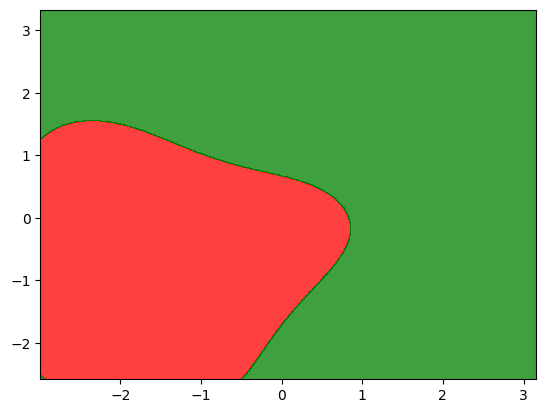

In [5]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

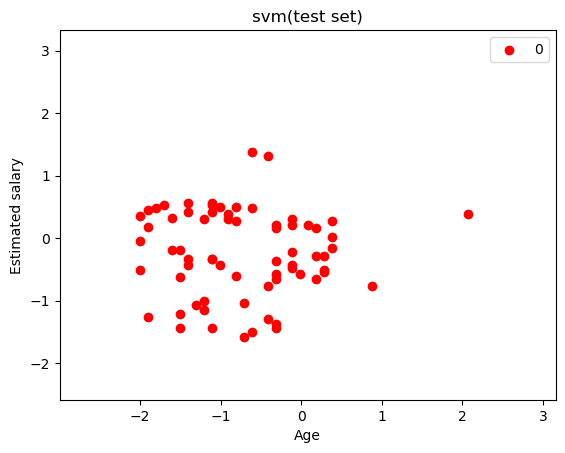

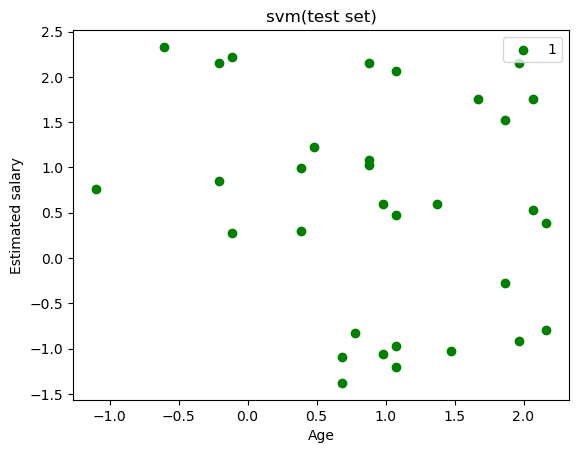

In [6]:
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    plt.title('svm(test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated salary')
    plt.legend()
    plt.show()